# Idea
Looking at trip duration between Subscribers and Customers for citiBike data. 
Categorizing by User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)

Our Hypothesis: Users that are subscribers take shorter distance rides compared to customers, who we assume are looking for a more leisurely and exploratory ride. 

Null Hypothesis: On average the trip duration is the same or longer for a sample of users that are Subscribers compared to Customers throughout the months of January and August. 

Alternative Hypothesis: On average the trip duration is the shorter for a sample of users that are Subscribers compared to Customers throughout the months of January and August.

_$H_0$ : $T{\mathrm{(Customers)}} <= T{\mathrm{(Subscribers)}}$ 

_$H_A$ : $T{\mathrm{(Customers)}} > T{\mathrm{(Subscribers)}}$

$\alpha$ : .05

In [2]:
from __future__ import print_function #for compatibility beteen python2 and python3

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
puidata = os.getenv("PUIDATA")
if not puidata or puidata == '/nfshome/sjs909/PUIdata':
    puidata = '/nfshome/sjs909/PUIDATA'

os.environ["PUIDATA"] = puidata
os.environ["PUIDATA"]

'/nfshome/sjs909/PUIDATA'

In [4]:
#read in the data from summer season and winter season
jan18 = pd.read_csv("%s/JC-201801-citibike-tripdata.csv.zip"%os.getenv("PUIDATA"))
aug18 = pd.read_csv("%s/JC-201808-citibike-tripdata.csv.zip"%os.getenv("PUIDATA"))

In [8]:
jan18.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,932,2018-01-01 02:06:17.5410,2018-01-01 02:21:50.0270,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31929,Subscriber,1992,1
1,550,2018-01-01 12:06:18.0390,2018-01-01 12:15:28.4430,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31845,Subscriber,1969,2
2,510,2018-01-01 12:06:56.9780,2018-01-01 12:15:27.8100,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31708,Subscriber,1946,1
3,354,2018-01-01 14:53:10.1860,2018-01-01 14:59:05.0960,3183,Exchange Place,40.716247,-74.033459,3267,Morris Canal,40.712419,-74.038526,31697,Subscriber,1994,1
4,250,2018-01-01 17:34:30.1920,2018-01-01 17:38:40.9840,3183,Exchange Place,40.716247,-74.033459,3639,Harborside,40.719252,-74.034234,31861,Subscriber,1991,1


In [5]:
df = pd.concat([jan18,aug18],axis=0)


In [12]:
df.shape

(57109, 15)

In [15]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [6]:
df_2c = df[['tripduration','usertype']]
df_2c.head(5)

,tripduration,usertype
0,932,Subscriber
1,550,Subscriber
2,510,Subscriber
3,354,Subscriber
4,250,Subscriber


Text(0.5,1,'Duration of Trip depending on UserType')

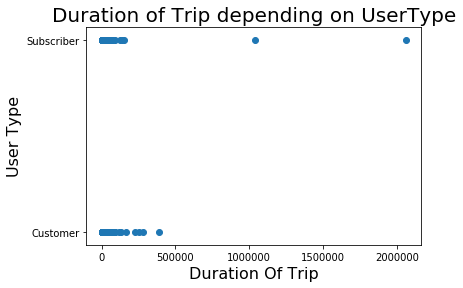

In [8]:
plt.scatter(df_2c['tripduration'],df_2c['usertype'])
plt.xlabel('Duration Of Trip', fontsize = 16)
plt.ylabel('User Type', fontsize = 16)
plt.title('Duration of Trip depending on UserType', fontsize = 20)

In [12]:
group_by_user = df_2c.groupby('usertype').mean()

In [15]:
group_by_user.head()

,tripduration,index
usertype,,
Customer,2625.579121,Customer
Subscriber,539.275230,Subscriber


In [21]:
539.275230/60

8.9879205

In [22]:
2625.579121/60

43.75965201666667

In [14]:
group_by_user['index'] = ('Customer','Subscriber')

Text(0.5,1,'Duration of Trip depending on UserType')

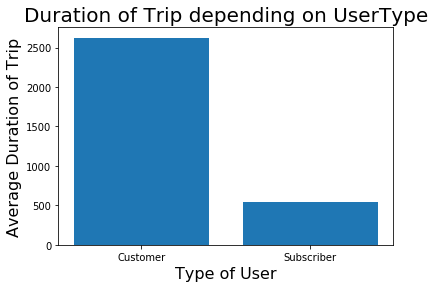

In [20]:
plt.bar(group_by_user['index'],group_by_user['tripduration'])
plt.xlabel('Type of User', fontsize = 16)
plt.ylabel('Average Duration of Trip', fontsize = 16)
plt.title('Duration of Trip depending on UserType', fontsize = 20)